<a href="https://colab.research.google.com/github/mazon1/ML-Test/blob/master/Dockship_personalbest__Plan_A_Stock_Market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# import google drive
from google.colab import drive
drive.mount('/content/drive/')

# Change directory to google drive- Just upload the file right into the drive you want(Uchennamachine) for easy access
%cd /content/drive/My Drive/

#read the file
df = pd.read_csv('dockshipnew_train.csv')
dftest =  pd.read_csv('dockshipnew_test.csv')

#print the head
df.head()




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [ ]:
# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date  Open-Stock-1  ...  Volume-Stock-5  Turnover-Stock-5
0  2010-06-01        1889.7  ...         1786082   213845404410000
1  2010-06-02        1848.0  ...         1307410   155564994855000
2  2010-06-03        1864.1  ...         1482919   182640434320000
3  2010-06-04        1906.0  ...         1454459   181767075850000
4  2010-06-07        1867.0  ...         1424594   172272511430000

[5 rows x 36 columns]

 Shape of the data:
(299, 36)


In [ ]:
#Converting the date to ordinal format. Model wasn't predicting with ML models without this change
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,733924,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,733925,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,733926,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,733927,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,733930,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [ ]:
# # setting the index as date
# df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
# df.index = df['Date']

There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.

Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing – 2010-06-05 and 2010-06-06 and fall on a weekend. 

In [ ]:
dftest.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,202.98,10501999,213174133870000,3011.15,3119.95,3011.15,3078.97,53783,16559616060000,1008.50,1015.0,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,194.86,13424736,261588793565000,3091.65,3095.00,3012.00,3061.60,129372,39608524605000,970.00,979.7,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,194.89,9002509,175445729750000,3015.05,3109.00,3010.00,3069.09,46725,14340318455000,940.05,975.0,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,197.61,19202643,379464261110000,3070.00,3164.00,2988.00,3113.84,88749,27635029505000,915.00,967.6,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,199.07,9274996,184640866420000,3125.00,3195.00,3125.00,3170.39,52720,16714302965000,963.95,971.2,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


In [ ]:
#convert Test Data dates to ordinal format
#Converting the date to ordinal format. Model wasn't predicting with ML models without this change


dftest['Date'] = pd.to_datetime(dftest['Date'])
dftest['Date']=dftest['Date'].map(dt.datetime.toordinal)
dftest.head()


,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,734353,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,202.98,10501999,213174133870000,3011.15,3119.95,3011.15,3078.97,53783,16559616060000,1008.50,1015.0,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,734354,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,194.86,13424736,261588793565000,3091.65,3095.00,3012.00,3061.60,129372,39608524605000,970.00,979.7,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,734357,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,194.89,9002509,175445729750000,3015.05,3109.00,3010.00,3069.09,46725,14340318455000,940.05,975.0,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,734358,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,197.61,19202643,379464261110000,3070.00,3164.00,2988.00,3113.84,88749,27635029505000,915.00,967.6,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,734359,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,199.07,9274996,184640866420000,3125.00,3195.00,3125.00,3170.39,52720,16714302965000,963.95,971.2,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


# Seperate Train Data Set into 5 stock 5 prices

In [ ]:
df1=df[['Date','Open-Stock-1','High-Stock-1','Low-Stock-1','Close-Stock-1','VWAP-Stock-1','Volume-Stock-1','Turnover-Stock-1']]
df2=df[['Date','Open-Stock-2','High-Stock-2','Low-Stock-2','Close-Stock-2','VWAP-Stock-2','Volume-Stock-2','Turnover-Stock-2']]
df3=df[['Date','Open-Stock-3','High-Stock-3','Low-Stock-3','Close-Stock-3','VWAP-Stock-3','Volume-Stock-3','Turnover-Stock-3']]
df4=df[['Date','Open-Stock-4','High-Stock-4','Low-Stock-4','Close-Stock-4','VWAP-Stock-4','Volume-Stock-4','Turnover-Stock-4']]
df5=df[['Date','Open-Stock-5','High-Stock-5','Low-Stock-5','Close-Stock-5','VWAP-Stock-5','Volume-Stock-5','Turnover-Stock-5']]

dftest1=dftest[['Date','Open-Stock-1','High-Stock-1','Low-Stock-1','VWAP-Stock-1','Volume-Stock-1','Turnover-Stock-1']]
dftest2=dftest[['Date','Open-Stock-2','High-Stock-2','Low-Stock-2','VWAP-Stock-2','Volume-Stock-2','Turnover-Stock-2']]
dftest3=dftest[['Date','Open-Stock-3','High-Stock-3','Low-Stock-3','VWAP-Stock-3','Volume-Stock-3','Turnover-Stock-3']]
dftest4=dftest[['Date','Open-Stock-4','High-Stock-4','Low-Stock-4','VWAP-Stock-4','Volume-Stock-4','Turnover-Stock-4']]
dftest5=dftest[['Date','Open-Stock-5','High-Stock-5','Low-Stock-5','VWAP-Stock-5','Volume-Stock-5','Turnover-Stock-5']]

In [ ]:
#Seperate Labels
# Extract labels for each stock training data
dflabel1=df[['Close-Stock-1']]
dflabel2=df[['Close-Stock-2']]
dflabel3=df[['Close-Stock-3']]
dflabel4=df[['Close-Stock-4']]
dflabel5=df[['Close-Stock-5']]

# Train-Test Split

In [ ]:
# #creating dataframe with date and the target variable
# data1 = df1.sort_index(ascending=True, axis=0)
# new_data1 = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close-Stock-1'])
# for i in range(0,len(data1)):
#   new_data1['Date'][i] = data1['Date'][i]
#   new_data1['Close-Stock-1'][i] = data1['Close-Stock-1'][i]

In [ ]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. 
#So here we have set the first 80% into training set and last 20% into validation set.

# # splitting into train and validation
# train = new_data[:987]
# valid = new_data[987:]


# Splitting Training Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df1
y1 = dflabel1

X2 = df2
y2 = dflabel2

X3 = df3
y3 = dflabel3

X4 = df4
y4 = dflabel4

X5 = df5
y5 = dflabel5

#While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. 
#So here we have set the first 80% into training set and last 20% into validation set. This is actually can be solved with a simple shuffle=False arg:

X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size = 0.2, random_state = 42,shuffle=False)
# for the other stocks
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size = 0.2, random_state = 42,shuffle=False)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size = 0.2, random_state = 42,shuffle=False)
X4_train, X4_val, y4_train, y4_val = train_test_split(X4, y4, test_size = 0.2, random_state = 42,shuffle=False)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5, y5, test_size = 0.2, random_state = 42,shuffle=False)
#had to remove ,stratify=y from the code for splitting for this to work

In [ ]:
#confirming that the split was done (80% to 20%)
for dataset in [y1_train, y1_val]:
    print(round(len(dataset) / len(y1), 2))

0.8
0.2


In [ ]:
#Display X_train to confirm split was not random
X1_train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1
0,733924,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000
1,733925,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000
2,733926,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000
3,733927,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000
4,733930,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000


In [ ]:
# #Converting the date to ordinal format.XTRAIN ONLY!!!! Model wasn't predicting with ML models without this change
# import datetime as dt

# X_train['Date'] = pd.to_datetime(X_train['Date'])
# X_train['Date']=X_train['Date'].map(dt.datetime.toordinal)
# X_train.head()

In [ ]:
# shapes of training set
print('\n Shape of training set:')
print(X1_train.shape)
print(X2_train.shape)
print(X3_train.shape)
print(X4_train.shape)
print(X5_train.shape)


 Shape of training set:
(239, 8)
(239, 8)
(239, 8)
(239, 8)
(239, 8)


In [ ]:
# shapes of validation set
print('\n Shape of validation set:')
print(X1_val.shape)


 Shape of validation set:
(60, 8)


Moving Average
Introduction
‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis. So this is a good starting point to use on our dataset for making predictions.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.
https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/?#


We will implement this technique on our dataset. The first step is to create a dataframe that contains only the Date and Close price columns, then split it into train and validation sets to verify our predictions.

In [ ]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds1 = []
for i in range(0,X1_val.shape[0]):
    a = X1_train['Close-Stock-1'][len(X1_train)-239+i:].sum() + sum(preds1)
    b = a/239
    preds1.append(b)


# for the other stocks:
preds2 = []
for i in range(0,X2_val.shape[0]):
    a = X2_train['Close-Stock-2'][len(X2_train)-239+i:].sum() + sum(preds2)
    b = a/239
    preds2.append(b)


preds3 = []
for i in range(0,X3_val.shape[0]):
    a = X3_train['Close-Stock-3'][len(X3_train)-239+i:].sum() + sum(preds3)
    b = a/239
    preds3.append(b)


preds4 = []
for i in range(0,X4_val.shape[0]):
    a = X4_train['Close-Stock-4'][len(X4_train)-239+i:].sum() + sum(preds4)
    b = a/239
    preds4.append(b)

preds5 = []
for i in range(0,X5_val.shape[0]):
    a = X5_train['Close-Stock-5'][len(X5_train)-239+i:].sum() + sum(preds5)
    b = a/239
    preds5.append(b)

In [ ]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(X1_val['Close-Stock-1'])-preds1),2)))
print('\n RMSE value on validation set:')
print(rms)

rms=np.sqrt(np.mean(np.power((np.array(X2_val['Close-Stock-2'])-preds2),2)))
print('\n RMSE value on validation set:')
print(rms)

rms=np.sqrt(np.mean(np.power((np.array(X3_val['Close-Stock-3'])-preds3),2)))
print('\n RMSE value on validation set:')
print(rms)

rms=np.sqrt(np.mean(np.power((np.array(X4_val['Close-Stock-4'])-preds4),2)))
print('\n RMSE value on validation set:')
print(rms)

rms=np.sqrt(np.mean(np.power((np.array(X5_val['Close-Stock-5'])-preds5),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
890.1505559529701

 RMSE value on validation set:
19.36922226367521

 RMSE value on validation set:
446.8482087743509

 RMSE value on validation set:
29.092651403292866

 RMSE value on validation set:
105.47084569881373


Just checking the RMSE does not help us in understanding how the model performed. Let’s visualize this to get a more intuitive understanding. So here is a plot of the predicted values along with the actual values.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


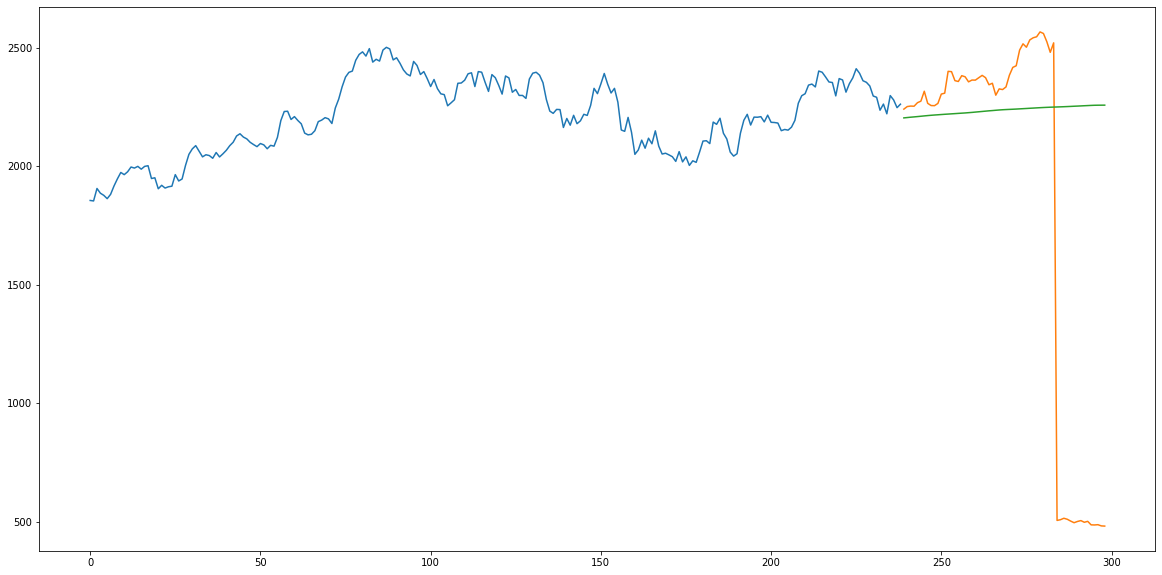

In [ ]:
#plot
X1_val['Predictions'] = 0
X1_val['Predictions'] = preds1
plt.plot(X1_train['Close-Stock-1'])
plt.plot(X1_val[['Close-Stock-1', 'Predictions']])

# Inference
The RMSE value is close to 890 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

In the next section, we will look at two commonly used machine learning techniques – Linear Regression and kNN, and see how they perform on our stock market data.

# Linear Regression

In [ ]:
X1_train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1
0,733924,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000
1,733925,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000
2,733926,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000
3,733927,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000
4,733930,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000


In [ ]:
X1_train = X1_train.drop('Close-Stock-1', axis=1)
y1_train = y1_train['Close-Stock-1']
X1_val = X1_val.drop('Close-Stock-1', axis=1)
y1_val = y1_val['Close-Stock-1']


X2_train = X2_train.drop('Close-Stock-2', axis=1)
y2_train = y2_train['Close-Stock-2']
X2_val = X2_val.drop('Close-Stock-2', axis=1)
y2_val = y2_val['Close-Stock-2']

X3_train = X3_train.drop('Close-Stock-3', axis=1)
y3_train = y3_train['Close-Stock-3']
X3_val = X3_val.drop('Close-Stock-3', axis=1)
y3_val = y3_val['Close-Stock-3']

X4_train = X4_train.drop('Close-Stock-4', axis=1)
y4_train = y4_train['Close-Stock-4']
X4_val = X4_val.drop('Close-Stock-4', axis=1)
y4_val = y4_val['Close-Stock-4']

X5_train = X5_train.drop('Close-Stock-5', axis=1)
y5_train = y5_train['Close-Stock-5']
X5_val = X5_val.drop('Close-Stock-5', axis=1)
y5_val = y5_val['Close-Stock-5']




In [ ]:

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train,y1_train)

#For the others
model.fit(X2_train,y2_train)
model.fit(X3_train,y3_train)
model.fit(X4_train,y4_train)
model.fit(X5_train,y5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Metric scoring for RMSE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


# Predict on Training Data

In [ ]:
#for stock 1
yhat1_train = model.predict(X1_train)
root_mean_squared_error = sqrt(mean_squared_error(y1_train, yhat1_train))

print('\n Metric Sores for stock #1_NOTE: RMSE is on line 2:')
display(mean_squared_error(y1_train, yhat1_train))
display(root_mean_squared_error)
display(mean_absolute_error(y1_train, yhat1_train))
display(r2_score(y1_train, yhat1_train))

#for stock 2
yhat2_train = model.predict(X2_train)
root_mean_squared_error = sqrt(mean_squared_error(y2_train, yhat2_train))

print('\n Metric Sores for stock #2_NOTE: RMSE is on line 2:')
display(mean_squared_error(y2_train, yhat2_train))
display(root_mean_squared_error)
display(mean_absolute_error(y2_train, yhat2_train))
display(r2_score(y2_train, yhat2_train))

#for stock 3
yhat3_train = model.predict(X3_train)
root_mean_squared_error = sqrt(mean_squared_error(y3_train, yhat3_train))

print('\n Metric Sores for stock #3_NOTE: RMSE is on line 2:')
display(mean_squared_error(y3_train, yhat3_train))
display(root_mean_squared_error)
display(mean_absolute_error(y3_train, yhat3_train))
display(r2_score(y3_train, yhat3_train))

#for stock 4
yhat4_train = model.predict(X4_train)
root_mean_squared_error = sqrt(mean_squared_error(y4_train, yhat4_train))

print('\n Metric Sores for stock #4_NOTE: RMSE is on line 2:')
display(mean_squared_error(y4_train, yhat4_train))
display(root_mean_squared_error)
display(mean_absolute_error(y4_train, yhat4_train))
display(r2_score(y4_train, yhat4_train))

#for stock 5
yhat5_train = model.predict(X5_train)
root_mean_squared_error = sqrt(mean_squared_error(y5_train, yhat5_train))

print('\n Metric Sores for stock #5_NOTE: RMSE is on line 2:')
display(mean_squared_error(y5_train, yhat5_train))
display(root_mean_squared_error)
display(mean_absolute_error(y5_train, yhat5_train))
display(r2_score(y5_train, yhat5_train))


 Metric Sores for stock #1_NOTE: RMSE is on line 2:


234.36279783253465

15.308912366087103

11.863780849164511

0.9906038527643235


 Metric Sores for stock #2_NOTE: RMSE is on line 2:


11712.18065304306

108.22282870560656

85.35086824093771

-3.672136248951494


 Metric Sores for stock #3_NOTE: RMSE is on line 2:


509.65977504273536

22.57564561740672

18.731276184828584

0.9803423307744418


 Metric Sores for stock #4_NOTE: RMSE is on line 2:


336.12025288575666

18.333582652764754

14.117167746494397

0.9690826102519371


 Metric Sores for stock #5_NOTE: RMSE is on line 2:


77.28174076952652

8.7910033994719

6.537250839105304

0.99260492225495

Inference: RMSE of 12 - relatively $12 since the data was not scaled.

# Predict on Test Data

In [ ]:
#for stock 1
yhat1_test1 = model.predict(dftest1)

#for stock 2
yhat2_test2 = model.predict(dftest2)

#for stock 3
yhat3_test3 = model.predict(dftest3)

#for stock 4
yhat4_test4 = model.predict(dftest4)

#for stock 5
yhat5_test5 = model.predict(dftest5)


# Creating Dataframe for Prediction of the 5 stocks using Linear Regression

In [ ]:
print(yhat1_test1)

[473.39948197 445.60756027 427.03315158 422.14341133 448.98770878
 470.45239492 446.58586162 437.49938893 443.19518987 407.98429918
 413.93168425 433.27944524 417.43263825 431.18904148 384.34617679
 431.1695805  433.0662714  432.93103637 437.65977952 445.32002753
 425.46148074 455.76292969 471.3986438  460.58921582 460.59402515
 462.87392105 464.69451417 466.60059136 463.6479491  471.66135207
 467.5637449  469.07288096 457.50979966 362.48888344 368.9911477
 421.28671615 421.96433883 379.85539363 424.33196516 410.65306942
 414.93466732 406.40443891 405.26757727 390.22411677 444.20373512
 418.35527672 449.32266683 466.19477298 470.55085088 466.61729892
 450.24425305 465.07195482 474.10734649 474.4246732  199.91762089
 482.01479167 441.2319652  462.04441441 458.53464636 469.98299156
 458.9182827  476.58798058 471.47487897 467.65677403 453.8570905
 453.31174332 452.97029714 459.22434127 443.3888046  433.5532572
 428.81502087 410.02785731 350.08927599 339.11438519 380.35830341
 419.67472796

## Create dataframe of the prediction on Test Data

In [ ]:
#convert Test Data dates from ordinal format back to regular format



# dftest['Date'] = pd.to_datetime(dftest['Date'])
dftest['Date']=dftest['Date'].map(dt.datetime.fromordinal)
dftest.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,202.98,10501999,213174133870000,3011.15,3119.95,3011.15,3078.97,53783,16559616060000,1008.50,1015.0,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,194.86,13424736,261588793565000,3091.65,3095.00,3012.00,3061.60,129372,39608524605000,970.00,979.7,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,194.89,9002509,175445729750000,3015.05,3109.00,3010.00,3069.09,46725,14340318455000,940.05,975.0,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,197.61,19202643,379464261110000,3070.00,3164.00,2988.00,3113.84,88749,27635029505000,915.00,967.6,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,199.07,9274996,184640866420000,3125.00,3195.00,3125.00,3170.39,52720,16714302965000,963.95,971.2,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


In [ ]:
d = {'Date': dftest['Date'], 'Close-Stock-1': yhat1_test1, 'Close-Stock-2':yhat2_test2, 'Close-Stock-3': yhat3_test3, 'Close-Stock-4': yhat4_test4, 'Close-Stock-5':yhat5_test5}
LRpredict=pd.DataFrame(data=d)
#.dt.strftime('%d-%m-%Y') changes the date format to what I want. I could use ('%d/%m/%Y') or ('%Y-%m-%d') or ('%Y/%m/%d')
LRpredict['Date']=LRpredict['Date'].dt.strftime('%Y-%m-%d')
LRpredict.to_csv('LRpredictdockship.csv', index=False)
LRpredict.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,473.399482,47.617989,3067.469912,992.068511,1293.351167
1,2011-08-05,445.607560,-10.710032,3022.047843,936.946789,1217.380165
2,2011-08-08,427.033152,64.563955,3054.089068,942.999196,1240.904143
3,2011-08-09,422.143411,-103.127623,3090.022786,918.494182,1204.058543
4,2011-08-10,448.987709,63.731689,3149.621686,950.013663,1238.532111


# Download file for Submission

In [ ]:
from google.colab import files
files.download('LRpredictdockship.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# k-NN Regressor

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#scaling data
X1_train_scaled = scaler.fit_transform(X1_train)
X1_train = pd.DataFrame(X1_train_scaled)
X1_val_scaled = scaler.fit_transform(X1_val)
X1_val = pd.DataFrame(X1_val_scaled)

In [ ]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
#fit the model and make predictions
model.fit(X1_train_scaled,y1_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# Metric scoring for RMSE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
yhat1_train = model.predict(X1_train_scaled)
root_mean_squared_error = sqrt(mean_squared_error(y1_train, yhat1_train))

display(mean_squared_error(y1_train, yhat1_train))
display(root_mean_squared_error)
display(mean_absolute_error(y1_train, yhat1_train))
display(r2_score(y1_train, yhat1_train))

575.3085795406038

23.9855910817433

18.76090854751945

0.9769345469105806

kNN perormed a bit worse with RMSE of 18.76